# Analysis of Auto Data from 1983 American Statistical Association Exposition

In [1]:
?ISLR::Auto

Auto {ISLR},R Documentation


Load data

In [2]:
auto <- read.table('Auto.data', header = T, na.strings = '?')
head(auto, 2)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320


In [3]:
dim(auto)

[1] 397   9

Remove rows with missing data

In [4]:
auto <- na.omit(auto)
dim(auto)

[1] 392   9

In [5]:
summary(auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

Range of all the quantitative predictors

In [6]:
cat('Range of mpg: ', range(auto$mpg), '\n')
cat('Range of cylinders: ', range(auto$cylinders), '\n')
cat('Range of displacement: ', range(auto$displacement), '\n')
cat('Range of horsepower: ', range(auto$horsepower), '\n')
cat('Range of weight: ', range(auto$weight), '\n')
cat('Range of acceleration: ', range(auto$acceleration), '\n')

Range of mpg:  9 46.6 
Range of cylinders:  3 8 
Range of displacement:  68 455 
Range of horsepower:  46 230 
Range of weight:  1613 5140 
Range of acceleration:  8 24.8 


Mean of all the quantitative predictors

In [7]:
lapply(auto[, c('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration')], mean)

$mpg
[1] 23.44592

$cylinders
[1] 5.471939

$displacement
[1] 194.412

$horsepower
[1] 104.4694

$weight
[1] 2977.584

$acceleration
[1] 15.54133

Standard deviation of all the quantitative predictors

In [8]:
lapply(auto[, c('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration')], sd)

$mpg
[1] 7.805007

$cylinders
[1] 1.705783

$displacement
[1] 104.644

$horsepower
[1] 38.49116

$weight
[1] 849.4026

$acceleration
[1] 2.758864

Mean and sd of data excluding rows 10-85

In [9]:
auto.subset <- auto[-(10:85), ]
dim(auto.subset)

[1] 316   9

In [10]:
lapply(auto.subset[, c('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration')], mean)

$mpg
[1] 24.40443

$cylinders
[1] 5.373418

$displacement
[1] 187.2405

$horsepower
[1] 100.7215

$weight
[1] 2935.972

$acceleration
[1] 15.7269

In [11]:
lapply(auto.subset[, c('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration')], sd)

$mpg
[1] 7.867283

$cylinders
[1] 1.654179

$displacement
[1] 99.67837

$horsepower
[1] 35.70885

$weight
[1] 811.3002

$acceleration
[1] 2.693721

Convert year, cylinders and origin to categorical predictors

In [12]:
auto$year <- as.factor(auto$year)

In [13]:
auto$origin <- as.factor(auto$origin)

In [14]:
auto$cylinders <- as.factor(auto$cylinders)

In [15]:
summary(auto)

      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year     origin                  name    
 Min.   : 8.00   73     : 40   1:245   amc matador       :  5  
 1st Qu.:13.78   78     : 36   2: 68   ford pinto        :  5  
 Median :15.50   76     : 34   3: 79   toyota corolla    :  5  
 Mean   :15.54   75     : 30           amc gremlin       :  4  
 3rd Qu.:17.02   82     : 30           amc hornet        :  4  
 Max.   :24.80   70     

Rename levels of `origin` to be actual values

In [16]:
levels(auto$origin)

[1] "1" "2" "3"

In [17]:
levels(auto$origin) <- list(American='1', European='2', Japanese='3')
levels(auto$origin)

[1] "American" "European" "Japanese"

In [18]:
summary(auto)

      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year          origin                    name    
 Min.   : 8.00   73     : 40   American:245   amc matador       :  5  
 1st Qu.:13.78   78     : 36   European: 68   ford pinto        :  5  
 Median :15.50   76     : 34   Japanese: 79   toyota corolla    :  5  
 Mean   :15.54   75     : 30                  amc gremlin       :  4  
 3rd Qu.:17.02   82     : 30                  amc hor

---

## Data Analysis

In [19]:
options(repr.plot.height=5.5)

In [20]:
names(auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

Plot relation between numeric predictors

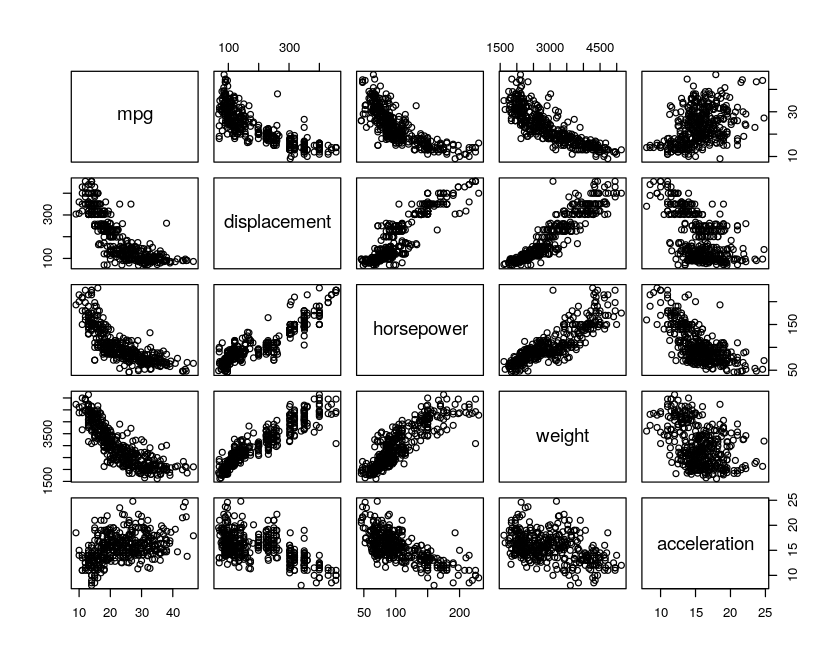

In [21]:
plot(auto[, -c(2, 7, 8, 9)])

Check the corelation between mpg and other predictors

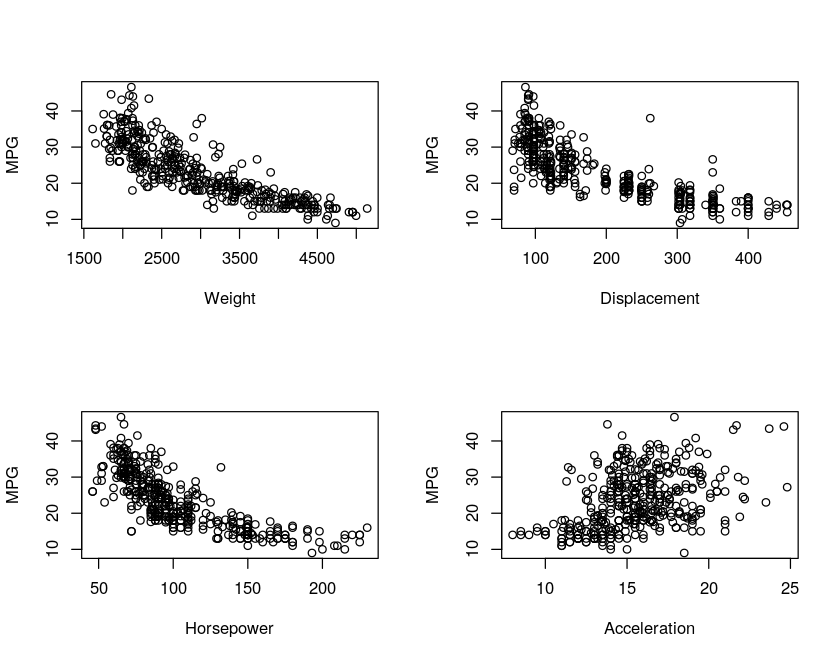

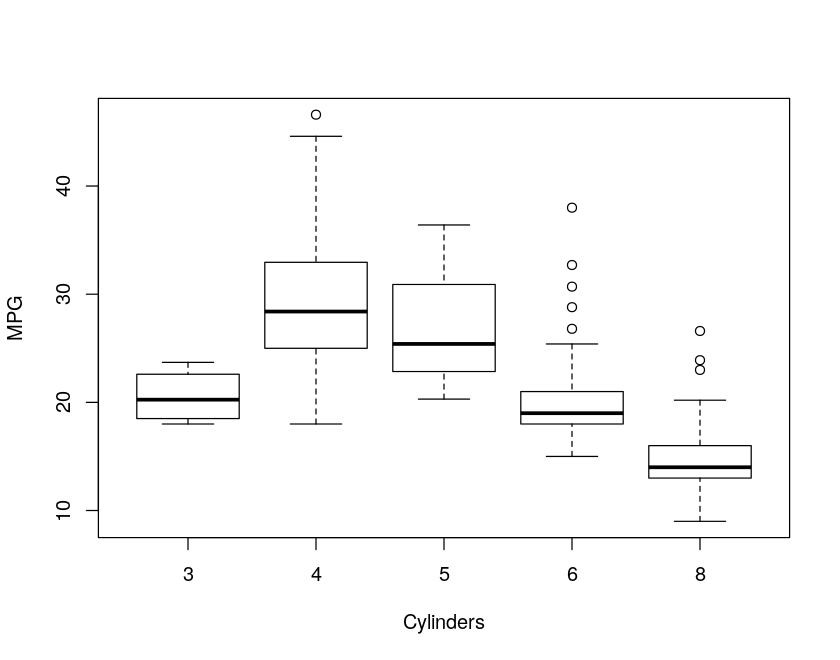

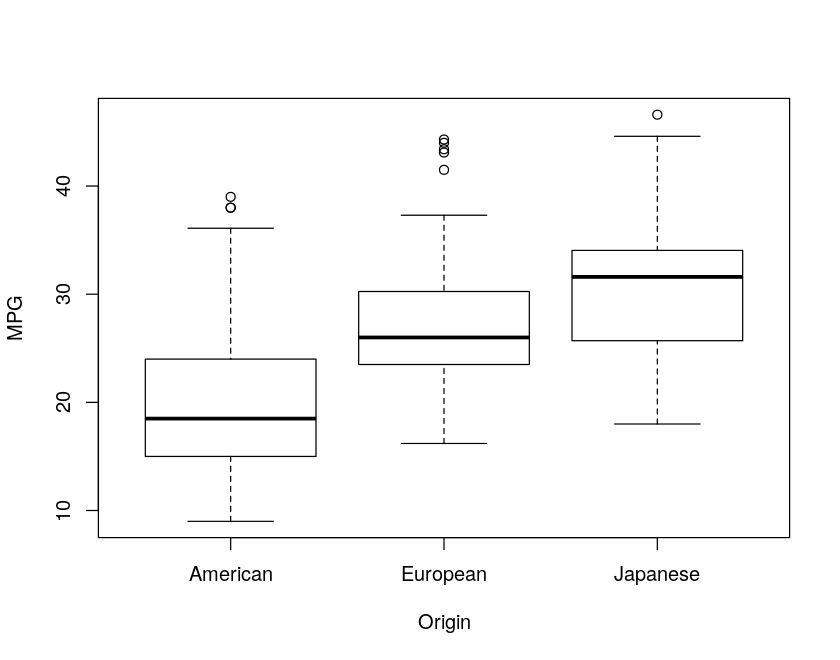

In [22]:
par(mfrow=c(2, 2))

plot(auto$weight, auto$mpg, xlab='Weight', ylab='MPG')
plot(auto$displacement, auto$mpg, xlab='Displacement', ylab='MPG')
plot(auto$horsepower, auto$mpg, xlab='Horsepower', ylab='MPG')
plot(auto$acceleration, auto$mpg, xlab='Acceleration', ylab='MPG')

par(mfrow=c(1, 1))
plot(auto$cylinders, auto$mpg, xlab='Cylinders', ylab='MPG')
plot(auto$origin, auto$mpg, xlab='Origin', ylab='MPG')

> **There seems to be a clear relation between a vehicle's mpg and its weight, displacement, horsepower, cylinders and also its origin. Though, acceleration doesn't seem to have much corelation with mpg.**

---

## Extra Analysis

In [23]:
summary(auto$cylinders)

3   4   5   6   8 
  4 199   3  83 103

Check the relationship between a vehicle's origin and the number of cylinder it has

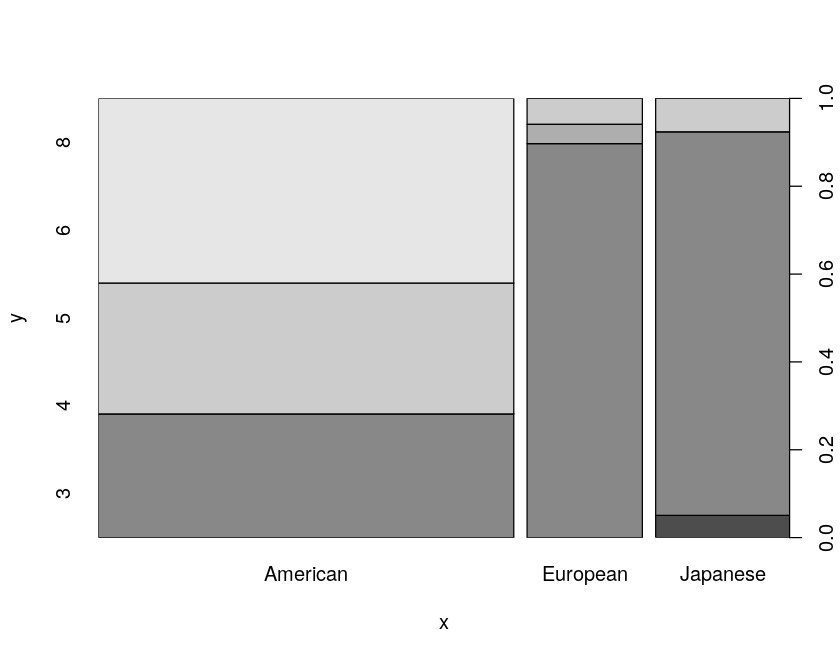

In [24]:
plot(auto$origin, auto$cylinders)

> Most of the Europen and Japanese vehicles have 4 cylinders, while a lot of American vehicles have 8 cylinders.

Check the relationship between a vehicle's origin and its acceleration

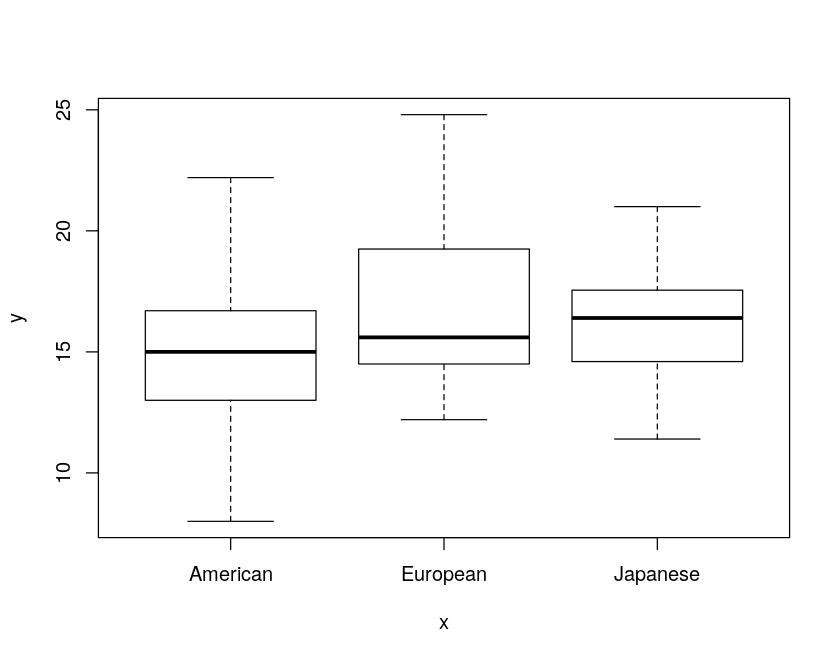

In [25]:
plot(auto$origin, auto$acceleration)

> Most of the American vehicles have better acceleration as compared to European and Japanese vehicles.

Check the relationship between a vehicle's origin and its horsepower

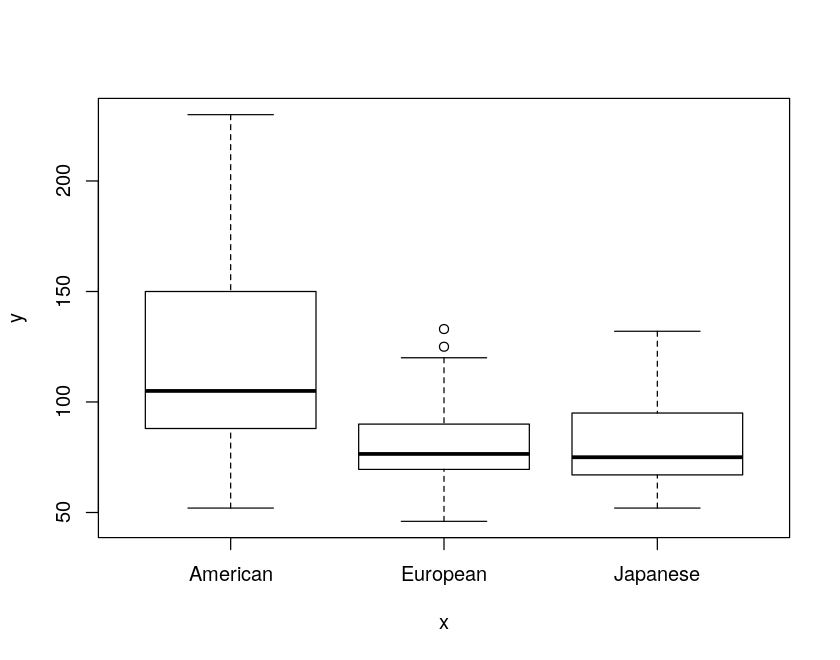

In [26]:
plot(auto$origin, auto$horsepower)

> American vehicles have more horsepower then other vehicles.

Check the relationship between a vehicle's origin and its acceleration

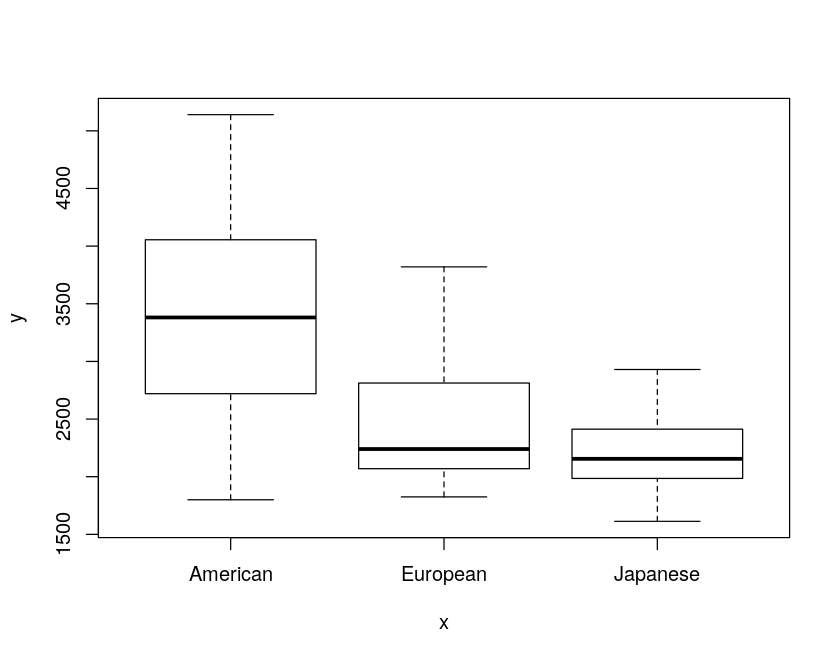

In [27]:
plot(auto$origin, auto$weight)

> American vehicles are a lot heavier than other vehicles.

In [28]:
names(auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

Check the relationship between the number of cylinders and overall performance of the vehicle

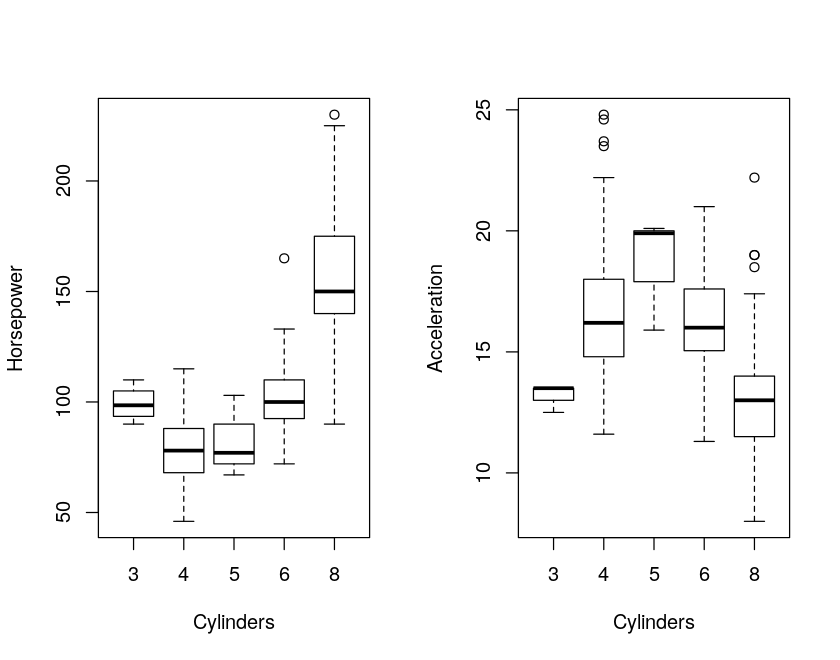

In [29]:
par(mfrow=c(1, 2))
plot(auto$cylinders, auto$horsepower, xlab='Cylinders', ylab='Horsepower')
plot(auto$cylinders, auto$acceleration, xlab='Cylinders', ylab='Acceleration')
par(mfrow=c(1, 1))

> More number of cylinders doesn't always gurantee better performance.

---

## Summary

- There seems to be a clear relation between a vehicle's mpg and its weight, displacement, horsepower, cylinders and also its origin. Though, acceleration doesn't seem to have much corelation with mpg.
- Most of the Europen and Japanese vehicles have 4 cylinders, while a lot of American vehicles have 8 cylinders.
- Most of the American vehicles have better acceleration as compared to European and Japanese vehicles.
- American vehicles have more horsepower then other vehicles.
- American vehicles are a lot heavier than other vehicles.
- More number of cylinders doesn't always gurantee better performance.